# # 6_1_2Tuning parameters of RF (Further investigation)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/SMOTE/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/SMOTE/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/SMOTE/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/SMOTE/y_test.csv')
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

In [3]:
y_train.loc[y_train['churn'] == 'Yes', 'churn'] = 1
y_train.loc[y_train['churn'] == 'No', 'churn'] = 0
y_train['churn'].value_counts()

churn
1    4130
0    4130
Name: count, dtype: int64

In [4]:
y_train['churn'] =y_train['churn'].astype('int64')
y_train['churn'].dtypes

dtype('int64')

In [5]:
y_test.loc[y_test['churn'] == 'Yes', 'churn'] = 1
y_test.loc[y_test['churn'] == 'No', 'churn'] = 0
y_test['churn'].value_counts()

churn
0    1033
1     374
Name: count, dtype: int64

In [6]:
y_test['churn'] =y_test['churn'].astype('int64')
y_test['churn'].dtypes

dtype('int64')

In [8]:
#set the high-parameter
import warnings
from tqdm.auto import tqdm

# Disable warnings
warnings.filterwarnings("ignore")

param_grid = {
    'n_estimators': [50, 75, 100, 125, 150,175,200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [10,15,17,20],
    'max_features': ['sqrt'] ,
    'bootstrap': [True, False]# round(sqrt(#cols))
}

rf = RandomForestClassifier(random_state=12345)

kappa_scorer = make_scorer(cohen_kappa_score)

# Disable tqdm progress bar and set mininterval to suppress messages
with tqdm(total=600, mininterval=1e-9) as pbar:
    grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True,
                               n_jobs=-1, verbose=20, scoring=kappa_scorer)
    grid_search.fit(X_train, y_train)
    pbar.update()  # Make sure progress bar completes

# Enable warnings again
warnings.filterwarnings("default")

grid_search.best_params_  # To check the best set of parameters returned


  0%|          | 0/600 [00:00<?, ?it/s]

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 2/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 2/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.799, test=0.626) total time=   6.2s
[CV 5/5; 3/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 3/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.779, test=0.724) total time=   6.8s
[CV 2/5; 5/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 5/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.806, test=0.627

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 1/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 1/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.775, test=0.712) total time=   3.6s
[CV 1/5; 3/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 3/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.813, test=0.528) total time=   7.7s
[CV 4/5; 4/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 4/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.778, test=0.738

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 2/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 2/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.811, test=0.536) total time=   6.3s
[CV 4/5; 3/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 3/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.780, test=0.734) total time=   6.9s
[CV 3/5; 5/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 5/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.777, test=0.708

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 1/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 1/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.778, test=0.735) total time=   3.6s
[CV 5/5; 2/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 5/5; 2/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.778, test=0.736) total time=   5.8s
[CV 3/5; 4/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 4/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.778, test=0.705) 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 1/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 1/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.798, test=0.623) total time=   3.7s
[CV 3/5; 3/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 3/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.778, test=0.705) total time=   7.6s
[CV 1/5; 5/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 5/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.812, test=0.529

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 2/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 3/5; 2/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.776, test=0.706) total time=   6.2s
[CV 1/5; 4/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 4/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.811, test=0.533) total time=   8.3s
[CV 4/5; 5/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 5/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.777, test=0.735

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 1/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 1/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.806, test=0.529) total time=   3.7s
[CV 2/5; 3/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 3/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.804, test=0.628) total time=   7.7s
[CV 5/5; 4/672] START bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 4/672] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.781, test=0.714

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 68/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150
[CV 2/5; 68/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=0.877, test=0.630) total time=  10.8s
[CV 1/5; 70/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200
[CV 1/5; 70/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=0.883, test=0.539) total time=  11.2s
[CV 5/5; 71/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 71/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=(train=0.778, test

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 76/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=175
[CV 4/5; 76/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=175;, score=(train=0.785, test=0.734) total time=  10.4s
[CV 3/5; 78/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50
[CV 3/5; 78/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=(train=0.782, test=0.697) total time=   3.2s
[CV 2/5; 79/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75
[CV 2/5; 79/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75;, score=(train=0.809, test=0

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 80/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100
[CV 2/5; 80/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=(train=0.814, test=0.615) total time=   6.8s
[CV 5/5; 81/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125
[CV 5/5; 81/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125;, score=(train=0.781, test=0.725) total time=   9.0s
[CV 3/5; 83/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175
[CV 3/5; 83/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175;, score=(train=0.781, te

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 73/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 73/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=0.780, test=0.728) total time=   8.1s
[CV 1/5; 75/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 1/5; 75/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=(train=0.820, test=0.527) total time=  13.2s
[CV 5/5; 76/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=175
[CV 5/5; 76/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=175;, score=(train=0.782, te

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 83/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175
[CV 1/5; 83/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175;, score=(train=0.821, test=0.527) total time=  13.2s
[CV 4/5; 84/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200
[CV 4/5; 84/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=(train=0.787, test=0.736) total time=  11.8s
[CV 2/5; 87/672] START bootstrap=True, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 87/672] END bootstrap=True, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.957, te

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 77/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/5; 77/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.814, test=0.617) total time=  12.2s
[CV 5/5; 79/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75
[CV 5/5; 79/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75;, score=(train=0.781, test=0.730) total time=   4.6s
[CV 3/5; 81/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125
[CV 3/5; 81/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125;, score=(train=0.781, test

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 77/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 1/5; 77/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.823, test=0.529) total time=  12.2s
[CV 5/5; 78/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50
[CV 5/5; 78/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=(train=0.778, test=0.719) total time=   2.6s
[CV 1/5; 80/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100
[CV 1/5; 80/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=(train=0.820, test

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 79/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75
[CV 1/5; 79/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75;, score=(train=0.821, test=0.522) total time=   4.2s
[CV 3/5; 80/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100
[CV 3/5; 80/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=(train=0.781, test=0.701) total time=   7.0s
[CV 1/5; 82/672] START bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150
[CV 1/5; 82/672] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150;, score=(train=0.820, test

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 152/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150
[CV 4/5; 152/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=0.887, test=0.775) total time=  11.9s
[CV 2/5; 154/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200
[CV 2/5; 154/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=0.909, test=0.639) total time=  19.3s
[CV 4/5; 156/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 156/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=(train=0.785

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 149/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75
[CV 4/5; 149/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75;, score=(train=0.883, test=0.776) total time=   7.4s
[CV 2/5; 151/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125
[CV 2/5; 151/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125;, score=(train=0.909, test=0.630) total time=   7.5s
[CV 5/5; 152/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150
[CV 5/5; 152/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=150;, score=(train=0.882

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 145/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 145/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.910, test=0.634) total time=   7.4s
[CV 5/5; 146/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175
[CV 5/5; 146/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175;, score=(train=0.883, test=0.768) total time=  12.8s
[CV 3/5; 148/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 3/5; 148/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.883

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 153/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=175
[CV 4/5; 153/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=175;, score=(train=0.888, test=0.775) total time=  19.4s
[CV 3/5; 155/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 155/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=(train=0.785, test=0.705) total time=   2.8s
[CV 2/5; 156/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 2/5; 156/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=(train=0.822, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 154/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200
[CV 1/5; 154/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=0.918, test=0.529) total time=  20.4s
[CV 5/5; 155/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 155/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=(train=0.783, test=0.726) total time=   4.1s
[CV 1/5; 157/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 157/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=0.831

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 156/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 1/5; 156/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=(train=0.831, test=0.530) total time=   7.1s
[CV 4/5; 157/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 157/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=0.790, test=0.734) total time=   5.4s
[CV 1/5; 159/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 1/5; 159/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=(train=0.829

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 153/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=175
[CV 2/5; 153/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=175;, score=(train=0.910, test=0.634) total time=  16.6s
[CV 5/5; 154/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200
[CV 5/5; 154/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=0.883, test=0.770) total time=  17.8s
[CV 2/5; 158/672] START bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=125
[CV 2/5; 158/672] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=125;, score=(train=0.8

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 222/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=(train=0.918, test=0.636) total time=   8.1s
[CV 5/5; 223/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=175
[CV 5/5; 223/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=175;, score=(train=0.905, test=0.782) total time=  10.1s
[CV 3/5; 225/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 225/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.853, test=0.742) total time=   2.6s
[CV 2/5; 226/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_sam

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 230/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175;, score=(train=0.883, test=0.538) total time=  10.0s
[CV 4/5; 231/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 4/5; 231/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.857, test=0.781) total time=  12.0s
[CV 2/5; 234/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 2/5; 234/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=(train=0.874, test=0.633) total time=   4.9s
[CV 5/5; 235/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 224/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=(train=0.908, test=0.752) total time=  11.1s
[CV 5/5; 226/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 5/5; 226/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=(train=0.850, test=0.771) total time=   4.4s
[CV 2/5; 228/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 2/5; 228/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.875, test=0.638) total time=   6.3s
[CV 5/5; 229/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_sam

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 221/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=125;, score=(train=0.916, test=0.542) total time=   7.1s
[CV 4/5; 222/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150
[CV 4/5; 222/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=(train=0.913, test=0.794) total time=   8.7s
[CV 2/5; 224/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200
[CV 2/5; 224/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=(train=0.917, test=0.637) total time=  11.2s
[CV 4/5; 226/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 227/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.855, test=0.768) total time=   5.0s
[CV 3/5; 229/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 3/5; 229/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.852, test=0.745) total time=   8.4s
[CV 1/5; 231/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/5; 231/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.884, test=0.534) total time=  11.1s
[CV 5/5; 232/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 222/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=(train=0.908, test=0.749) total time=   8.2s
[CV 1/5; 224/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200
[CV 1/5; 224/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=(train=0.916, test=0.539) total time=  11.2s
[CV 5/5; 225/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 225/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.852, test=0.769) total time=   3.0s
[CV 1/5; 227/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_sam

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 229/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.883, test=0.536) total time=   8.1s
[CV 4/5; 230/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175
[CV 4/5; 230/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175;, score=(train=0.858, test=0.777) total time=   8.9s
[CV 2/5; 232/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/5; 232/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.868, test=0.628) total time=   3.7s
[CV 1/5; 233/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_sam

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 228/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.854, test=0.766) total time=   6.7s
[CV 3/5; 230/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175
[CV 3/5; 230/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175;, score=(train=0.854, test=0.746) total time=   9.5s
[CV 1/5; 232/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/5; 232/672] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.879, test=0.531) total time=   3.3s
[CV 4/5; 232/672] START bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, min_sam

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 287/672] END bootstrap=True, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.786, test=0.730) total time=  14.0s
[CV 1/5; 291/672] START bootstrap=True, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125
[CV 1/5; 291/672] END bootstrap=True, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125;, score=(train=0.832, test=0.539) total time=   7.1s
[CV 4/5; 292/672] START bootstrap=True, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150
[CV 4/5; 292/672] END bootstrap=True, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150;, score=(train=0.791, test=0.752) total time=   7.9s
[CV 2/5; 294/672] START bootstrap=True, criterion=entropy, max_depth=17, max_features=sqrt, min_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 292/672] END bootstrap=True, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150;, score=(train=0.833, test=0.536) total time=   7.9s
[CV 5/5; 293/672] START bootstrap=True, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175
[CV 5/5; 293/672] END bootstrap=True, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175;, score=(train=0.787, test=0.731) total time=  13.1s
[CV 3/5; 295/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 295/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.979, test=0.769) total time=   3.5s
[CV 3/5; 296/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_sam

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 298/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.983, test=0.810) total time=   8.1s
[CV 3/5; 300/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 3/5; 300/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175;, score=(train=0.982, test=0.771) total time=   9.9s
[CV 1/5; 302/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 1/5; 302/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.969, test=0.536) total time=   4.7s
[CV 2/5; 302/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_sam

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 304/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=(train=0.968, test=0.795) total time=   5.3s
[CV 2/5; 306/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150
[CV 2/5; 306/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=(train=0.972, test=0.626) total time=  11.0s
[CV 5/5; 307/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=175
[CV 5/5; 307/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=175;, score=(train=0.967, test=0.801) total time=  10.5s
[CV 4/5; 309/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 297/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.983, test=0.810) total time=   6.6s
[CV 3/5; 299/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 299/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.981, test=0.769) total time=   8.8s
[CV 1/5; 301/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 301/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.982, test=0.538) total time=  14.6s
[CV 5/5; 302/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 303/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.967, test=0.800) total time=   5.1s
[CV 3/5; 305/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=125
[CV 3/5; 305/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=125;, score=(train=0.967, test=0.766) total time=   6.7s
[CV 1/5; 307/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=175
[CV 1/5; 307/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=175;, score=(train=0.975, test=0.523) total time=  12.8s
[CV 4/5; 308/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_sa

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 301/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.982, test=0.808) total time=  17.5s
[CV 2/5; 305/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=125
[CV 2/5; 305/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=125;, score=(train=0.972, test=0.623) total time=   6.8s
[CV 5/5; 306/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150
[CV 5/5; 306/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=(train=0.967, test=0.803) total time=  11.4s
[CV 3/5; 308/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 307/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=175;, score=(train=0.968, test=0.769) total time=  12.3s
[CV 1/5; 309/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 309/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.911, test=0.534) total time=   2.9s
[CV 3/5; 309/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 309/672] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.882, test=0.745) total time=   2.8s
[CV 2/5; 310/672] START bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_sampl

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 369/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 2/5; 369/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=(train=0.782, test=0.627) total time=   7.9s
[CV 1/5; 371/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 1/5; 371/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.791, test=0.530) total time=  11.9s
[CV 5/5; 372/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50
[CV 5/5; 372/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=(train

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 367/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 367/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=0.756, test=0.717) total time=   5.4s
[CV 3/5; 369/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 3/5; 369/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=(train=0.751, test=0.692) total time=   7.7s
[CV 5/5; 370/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=175
[CV 5/5; 370/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=175;, score=(tra

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 363/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=175
[CV 2/5; 363/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=175;, score=(train=0.804, test=0.623) total time=   7.8s
[CV 5/5; 364/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200
[CV 5/5; 364/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=0.779, test=0.731) total time=   8.0s
[CV 2/5; 368/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=125
[CV 2/5; 368/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=125;, score=(tra

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 373/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75
[CV 1/5; 373/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75;, score=(train=0.792, test=0.530) total time=   4.6s
[CV 3/5; 374/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100
[CV 3/5; 374/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=(train=0.752, test=0.692) total time=   6.3s
[CV 1/5; 376/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150
[CV 1/5; 376/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150;, score=(train

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 375/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125
[CV 1/5; 375/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125;, score=(train=0.795, test=0.525) total time=   7.5s
[CV 4/5; 376/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150
[CV 4/5; 376/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150;, score=(train=0.753, test=0.730) total time=   7.9s
[CV 2/5; 378/672] START bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200
[CV 2/5; 378/672] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=(tra

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 379/672] START bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 379/672] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.933, test=0.769) total time=   4.5s
[CV 4/5; 380/672] START bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 4/5; 380/672] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.940, test=0.800) total time=   8.5s
[CV 2/5; 382/672] START bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 382/672] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 381/672] START bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 381/672] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.942, test=0.797) total time=  13.5s
[CV 3/5; 383/672] START bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 383/672] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.933, test=0.764) total time=  22.0s
[CV 1/5; 385/672] START bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 385/672] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(tra

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 385/672] START bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 5/5; 385/672] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.934, test=0.794) total time=  29.2s
[CV 5/5; 388/672] START bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 5/5; 388/672] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=(train=0.930, test=0.809) total time=  14.6s
[CV 3/5; 390/672] START bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150
[CV 3/5; 390/672] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=(tra

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 437/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 437/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.935, test=0.794) total time=  10.0s
[CV 2/5; 439/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 439/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.941, test=0.637) total time=  15.9s
[CV 5/5; 440/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175
[CV 5/5; 440/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175;, score=(tra

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 442/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 4/5; 442/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.933, test=0.800) total time=   4.9s
[CV 3/5; 443/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75
[CV 3/5; 443/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75;, score=(train=0.929, test=0.763) total time=   5.7s
[CV 5/5; 444/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 5/5; 444/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=(train=0

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 449/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 1/5; 449/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=(train=0.884, test=0.538) total time=   4.4s
[CV 2/5; 449/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 449/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=(train=0.872, test=0.631) total time=   3.5s
[CV 1/5; 450/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 1/5; 450/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=(train=0.8

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 436/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 3/5; 436/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=(train=0.929, test=0.763) total time=   6.0s
[CV 5/5; 437/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 437/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.933, test=0.787) total time=  10.1s
[CV 3/5; 439/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 3/5; 439/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 449/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 449/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=(train=0.848, test=0.738) total time=   3.5s
[CV 2/5; 450/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 2/5; 450/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=(train=0.877, test=0.631) total time=   5.1s
[CV 4/5; 451/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 451/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=0

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 457/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75
[CV 4/5; 457/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75;, score=(train=0.855, test=0.762) total time=   6.6s
[CV 3/5; 459/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125
[CV 3/5; 459/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=125;, score=(train=0.847, test=0.736) total time=   8.5s
[CV 4/5; 460/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150
[CV 4/5; 460/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150;, score=(train

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 469/672] START bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 469/672] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.989, test=0.534) total time=  20.2s
[CV 5/5; 470/672] START bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 5/5; 470/672] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.988, test=0.823) total time=   5.3s
[CV 1/5; 472/672] START bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 1/5; 472/672] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=(train

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 461/672] START bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175
[CV 5/5; 461/672] END bootstrap=False, criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175;, score=(train=0.847, test=0.759) total time=  39.9s
[CV 3/5; 463/672] START bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 463/672] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.988, test=0.787) total time=   8.1s
[CV 3/5; 464/672] START bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 3/5; 464/672] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 503/672] START bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175
[CV 4/5; 503/672] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=175;, score=(train=0.862, test=0.765) total time=  23.1s
[CV 2/5; 505/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 505/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.804, test=0.616) total time=   6.1s
[CV 1/5; 506/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 506/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, sc

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 513/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=75;, score=(train=0.810, test=0.628) total time=   6.0s
[CV 4/5; 514/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 4/5; 514/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=(train=0.780, test=0.736) total time=   6.7s
[CV 2/5; 516/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150
[CV 2/5; 516/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=(train=0.809, test=0.625) total time=  10.2s
[CV 5/5; 517/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 522/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.768, test=0.736) total time=   9.6s
[CV 3/5; 524/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175
[CV 3/5; 524/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=175;, score=(train=0.763, test=0.707) total time=  13.7s
[CV 1/5; 526/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/5; 526/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.805, test=0.523) total time=   4.3s
[CV 2/5; 526/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 3/5; 516/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=(train=0.776, test=0.711) total time=  10.0s
[CV 1/5; 518/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200
[CV 1/5; 518/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=(train=0.809, test=0.540) total time=  19.3s
[CV 5/5; 519/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 519/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.761, test=0.735) total time=   4.4s
[CV 1/5; 521/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 522/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.762, test=0.707) total time=   9.4s
[CV 5/5; 523/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 5/5; 523/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.770, test=0.737) total time=  10.7s
[CV 3/5; 525/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 525/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.762, test=0.707) total time=  15.9s
[CV 5/5; 527/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 532/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=(train=0.806, test=0.534) total time=  13.9s
[CV 5/5; 533/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 533/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=(train=0.743, test=0.718) total time=   3.0s
[CV 1/5; 535/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 535/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=(train=0.791, test=0.534) total time=   5.3s
[CV 4/5; 536/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 542/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=(train=0.748, test=0.713) total time=   4.9s
[CV 3/5; 544/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150
[CV 3/5; 544/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=150;, score=(train=0.748, test=0.692) total time=  11.8s
[CV 1/5; 546/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200
[CV 1/5; 546/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=(train=0.791, test=0.539) total time=  17.3s
[CV 5/5; 547/672] START bootstrap=False, criterion=entropy, max_depth=15, max_features=sqrt,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 537/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=(train=0.751, test=0.729) total time=  10.6s
[CV 2/5; 539/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/5; 539/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=(train=0.781, test=0.628) total time=   9.9s
[CV 5/5; 541/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75
[CV 5/5; 541/672] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75;, score=(train=0.748, test=0.715) total time=   3.5s
[CV 1/5; 543/672] START bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 175}

##### 
The parameter {'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 175}was chosen. 

####  Cross validation socre - Kappa-

In [9]:
rf1= RandomForestClassifier(criterion= 'gini',
 max_depth= 20,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 175,
 bootstrap = False
                           )

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(rf1, X_train, y_train, cv=kfold, scoring=kappa_scorer)

results.append(cv_results)
    
msg = f" RF: {cv_results.mean()} ({cv_results.std()})"
print(msg)

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 610/672] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.925, test=0.791) total time=   8.7s
[CV 1/5; 612/672] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 1/5; 612/672] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=(train=0.939, test=0.531) total time=  19.5s
[CV 4/5; 613/672] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125
[CV 4/5; 613/672] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125;, score=(train=0.936, test=0.798) total time=  24.8s
[CV 2/5; 615/672] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 589/672] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.957, test=0.799) total time=   5.8s
[CV 1/5; 591/672] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 591/672] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.963, test=0.533) total time=   9.3s
[CV 4/5; 592/672] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 592/672] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.966, test=0.809) total time=  15.6s
[CV 2/5; 594/672] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 590/672] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.959, test=0.805) total time=   7.2s
[CV 3/5; 592/672] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 592/672] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.962, test=0.780) total time=  12.7s
[CV 1/5; 594/672] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175
[CV 1/5; 594/672] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=175;, score=(train=0.965, test=0.540) total time=  20.1s
[CV 4/5; 595/672] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

 RF: 0.3873339218765799 (0.2616981533901036)


### Variable Importance 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


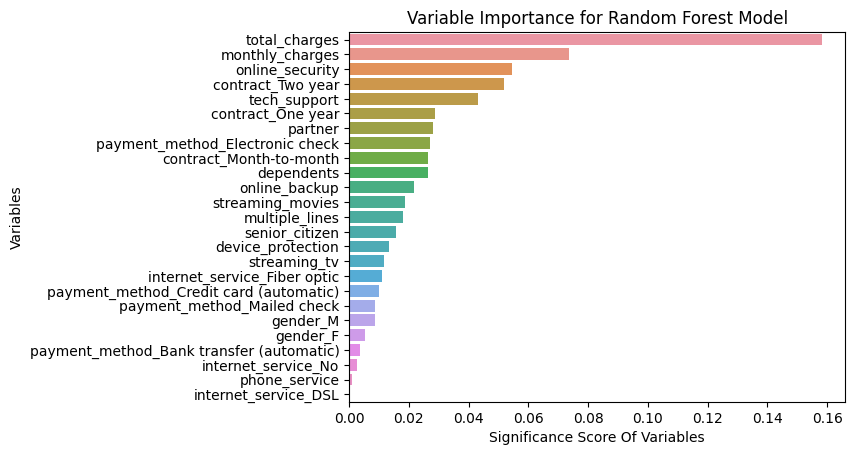

In [10]:
X_train2 = X_train.copy()  
y_train2 = y_train.copy()



rf_tuned = rf1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(rf_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Random Forest Model")
plt.show()


In [11]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df.head()

,0
total_charges,0.158099
monthly_charges,0.073426
online_security,0.054431
contract_Two year,0.051671
tech_support,0.043111


In [12]:
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
total_charges,0.158099
monthly_charges,0.073426


In [13]:
feature_importances_df.to_csv('../data/Significant_Score/SMOTETemek_RF_Significance_Score.csv', index=False)

### the classification report

In [14]:
from sklearn.metrics import confusion_matrix


y_pred = rf1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[859, 174],
       [171, 203]])

In [15]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    1030
1     377
Name: count, dtype: int64

In [16]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
0        1033
1         374
Name: count, dtype: int64

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = rf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.754797
1,Precision,0.538462
2,Recall,0.542781
3,F1-Score,0.540613
4,Kappa,0.373384


In [18]:
metrics_df.to_csv('../data/metrics/SMOTETemek_rf_metrics.csv', index=False)